In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import cv2
import os
import matplotlib.pyplot as plt
import torch
from kornia.color import bgr_to_rgb
from tqdm.notebook import tqdm, trange

In [2]:
# Loading previous losses and accuracies
def loadModelData(directory='./Saved/'):
    acc = []
    los = []
        
    try:
        with open(f'{directory}/accuracies.txt', 'r') as fd:
            acc = [float(acc.rstrip()) for acc in fd.readlines()]

        with open(f'{directory}/losses.txt', 'r') as fd:
            los = [float(losses.rstrip()) for losses in fd.readlines()]
    except IOError:
        print('file not Found')
    
    return acc, los

In [3]:
graph_path = './Graphs'
if not Path(graph_path).is_dir():
    Path.mkdir(Path(graph_path))

In [4]:
directory = './Saved/'
model_data_folders = os.listdir(directory)

In [5]:
accuracy_dict = {}
loss_dict = {}

In [6]:
model_dict = {}
for folder in model_data_folders:
    accuracies, _ = loadModelData(directory+folder)
    
    model_dict[folder] = len(accuracies)

In [7]:
model_dict = sorted(model_dict.items(), key=lambda x: x[1], reverse=True)
model_data_folders = [x[0] for x in model_dict]

In [8]:
model_data_folders

['Unet++_Resnet152_LAB_MS-SSIM_None',
 'Unet++_Resnet50_LAB_MS-SSIM_None',
 'Unet++_Resnet152_RGB_MS-SSIM_None',
 'Unet++_Resnet34_LAB_MS-SSIM_None',
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None',
 'Unet++_Resnet18_LAB_MS-SSIM_None',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None',
 'Unet++_Resnet101_LAB_MS-SSIM_None',
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None',
 'Unet_Resnet152_LAB_MS-SSIM_None',
 'Unet++_Resnet152_LAB_MSELoss_None',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50',
 'Unet++_Resnet50_RGB_MS-SSIM_None',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16',
 'Unet++_Resnet152_LAB_MSELoss_Vgg16',
 'Unet++_Resnet152_LAB_MSELoss_Resnet50']

In [9]:
name_dict = {f'{directory}': f'KMHCNet_{i}' for i, directory in enumerate(model_data_folders, 1)}

In [10]:
name_dict

{'Unet++_Resnet152_LAB_MS-SSIM_None': 'KMHCNet_1',
 'Unet++_Resnet50_LAB_MS-SSIM_None': 'KMHCNet_2',
 'Unet++_Resnet152_RGB_MS-SSIM_None': 'KMHCNet_3',
 'Unet++_Resnet34_LAB_MS-SSIM_None': 'KMHCNet_4',
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None': 'KMHCNet_5',
 'Unet++_Resnet18_LAB_MS-SSIM_None': 'KMHCNet_6',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None': 'KMHCNet_7',
 'Unet++_Resnet101_LAB_MS-SSIM_None': 'KMHCNet_8',
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None': 'KMHCNet_9',
 'Unet_Resnet152_LAB_MS-SSIM_None': 'KMHCNet_10',
 'Unet++_Resnet152_LAB_MSELoss_None': 'KMHCNet_11',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50': 'KMHCNet_12',
 'Unet++_Resnet50_RGB_MS-SSIM_None': 'KMHCNet_13',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16': 'KMHCNet_14',
 'Unet++_Resnet152_LAB_MSELoss_Vgg16': 'KMHCNet_15',
 'Unet++_Resnet152_LAB_MSELoss_Resnet50': 'KMHCNet_16'}

In [11]:
for folder in model_data_folders:
    accuracies, losses = loadModelData(directory+folder)
    
    accuracy_dict[name_dict[folder]] = {
        f'{i+1}': d[0] for i, d in enumerate(zip(accuracies, losses))
    }
    
    loss_dict[name_dict[folder]] = {
        f'{i+1}': d[1] for i, d in enumerate(zip(accuracies, losses))
    }

In [12]:
accuracy_df = pd.DataFrame(accuracy_dict)
loss_df = pd.DataFrame(loss_dict)

In [13]:
accuracy_df.head()

,KMHCNet_1,KMHCNet_2,KMHCNet_3,KMHCNet_4,KMHCNet_5,KMHCNet_6,KMHCNet_7,KMHCNet_8,KMHCNet_9,KMHCNet_10,KMHCNet_11,KMHCNet_12,KMHCNet_13,KMHCNet_14,KMHCNet_15,KMHCNet_16
1,0.786318,0.738953,0.939060,0.749436,0.784369,0.767577,0.773702,0.778421,0.730775,0.781266,0.758406,0.767791,0.928936,0.773501,0.719070,0.678338
2,0.794861,0.763692,0.936909,0.765140,0.794132,0.789236,0.788492,0.792928,0.782685,0.738558,0.772579,0.769871,0.932213,0.775526,0.715112,0.691338
3,0.798087,0.775256,0.939930,0.776109,0.797645,0.791459,0.784773,0.797221,0.795083,0.790012,0.763740,0.768401,0.933808,0.777787,0.704659,0.739383
4,0.798358,0.783361,0.941186,0.780391,0.796736,0.797286,0.796880,0.782933,0.795040,0.785319,0.759445,0.769895,0.935120,0.779610,0.733748,0.737558
5,0.796588,0.784914,0.941797,0.783700,0.801498,0.795594,0.798973,0.795850,0.796967,0.793752,0.776024,0.769831,0.935504,0.782069,0.714409,0.695461


In [14]:
loss_df.head()

,KMHCNet_1,KMHCNet_2,KMHCNet_3,KMHCNet_4,KMHCNet_5,KMHCNet_6,KMHCNet_7,KMHCNet_8,KMHCNet_9,KMHCNet_10,KMHCNet_11,KMHCNet_12,KMHCNet_13,KMHCNet_14,KMHCNet_15,KMHCNet_16
1,0.213682,0.261047,0.060940,0.250564,0.215631,0.232423,0.226298,0.221579,0.269225,0.218734,0.214111,0.483726,0.071064,0.147155,0.074250,0.453633
2,0.205139,0.236308,0.063091,0.234860,0.205868,0.210764,0.211509,0.207072,0.217315,0.261442,0.203577,0.476641,0.067787,0.145449,0.069681,0.443633
3,0.201914,0.224743,0.060070,0.223891,0.202356,0.208542,0.215227,0.202779,0.204917,0.209988,0.207115,0.479181,0.066192,0.146044,0.079220,0.436923
4,0.201642,0.216639,0.058814,0.219609,0.203264,0.202714,0.203120,0.217067,0.204959,0.214681,0.235963,0.474432,0.064880,0.144162,0.066591,0.447593
5,0.203412,0.215086,0.058203,0.216300,0.198502,0.204406,0.201027,0.204150,0.203033,0.206248,0.193386,0.472636,0.064496,0.142919,0.075109,0.478563


In [15]:
fontSize = 18

In [16]:
# for i in range(3):
#     fig = plt.figure()
#     loss_figs = loss_df.iloc[:, i*6:(i+1)*6].plot(figsize=(18, 10), subplots=True, layout=(3,2), fontsize=13, grid=True, legend = False)
#     [ax.set_title(model_data_folders[i*6:(i+1)*6][j], fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_ylabel('Loss', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_xlabel('Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     plt.tight_layout()
#     plt.savefig(f'{graph_path}/Loss_Plot_{i+1}.jpg')

<Figure size 432x288 with 0 Axes>

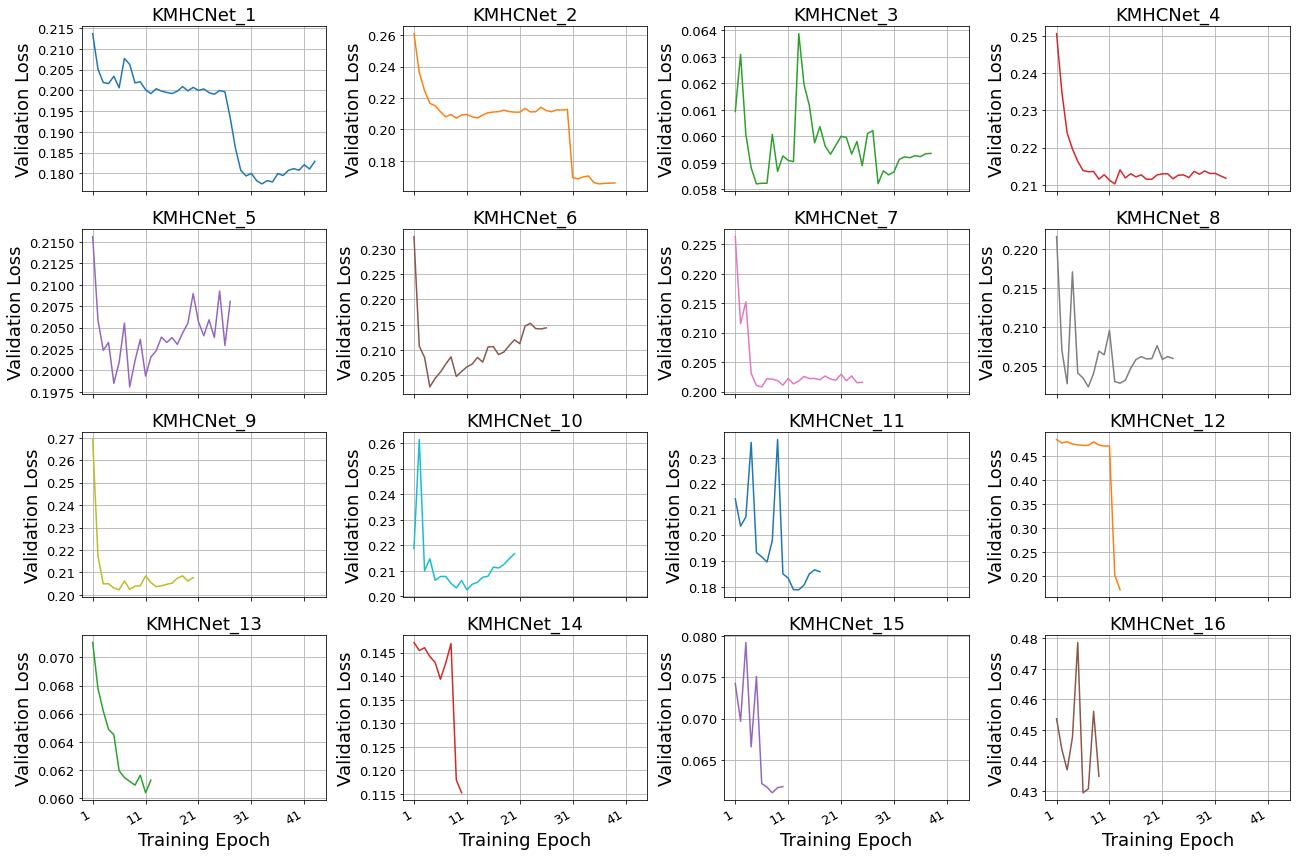

In [17]:
fig = plt.figure()
loss_figs = loss_df.plot(figsize=(18, 12), subplots=True, layout=(4,4), fontsize=13, grid=True, legend = False)
[ax.set_title(name_dict[model_data_folders[i]], fontdict={'fontsize':fontSize}) for i, ax in enumerate(plt.gcf().axes)]
[ax.set_ylabel('Validation Loss', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
[ax.set_xlabel('Training Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
plt.tight_layout()
plt.savefig(f'{graph_path}/Loss_Plot_All.jpg')

In [18]:
# for i in range(3):
#     fig = plt.figure()
#     acc_figs = accuracy_df.iloc[:, i*6:(i+1)*6].plot(figsize=(18, 10), subplots=True, layout=(3,2), fontsize=13, grid=True, legend = False)
#     [ax.set_title(model_data_folders[i*6:(i+1)*6][j], fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_ylabel('Accuracy', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_xlabel('Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     plt.tight_layout()
#     plt.savefig(f'{graph_path}/Accuracy_Plot_{i+1}.jpg')

<Figure size 432x288 with 0 Axes>

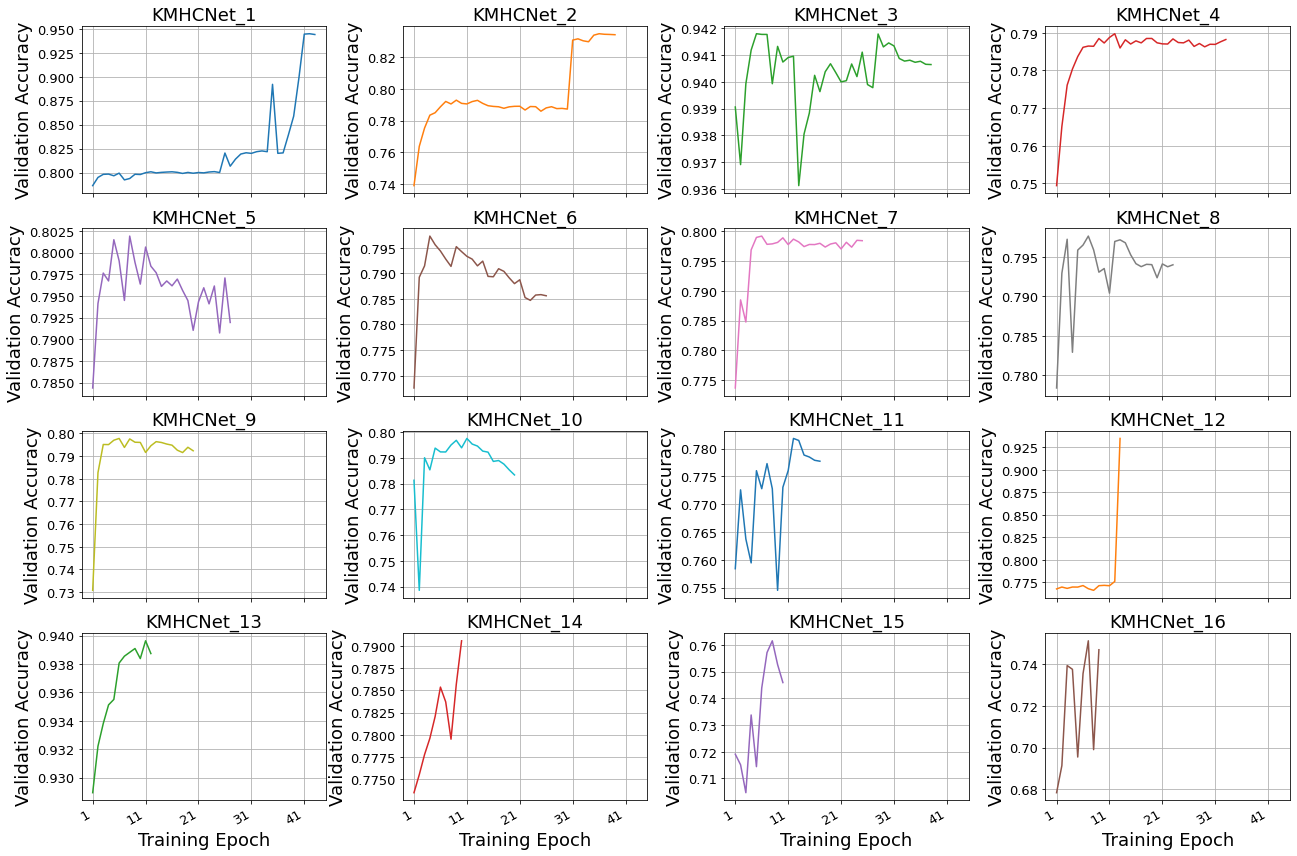

In [19]:
fig = plt.figure()
acc_figs = accuracy_df.plot(figsize=(18, 12), subplots=True, layout=(4,4), fontsize=13, grid=True, legend=False)
[ax.set_title(name_dict[model_data_folders[i]], fontdict={'fontsize':fontSize}) for i, ax in enumerate(plt.gcf().axes)]
[ax.set_ylabel('Validation Accuracy', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
[ax.set_xlabel('Training Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
plt.tight_layout()
plt.savefig(f'{graph_path}/Accuracy_Plot_All.jpg')

In [20]:
test_loss = []
test_accuracy = []

In [21]:
def getTestResult(directory):
    loss = 0
    acc = 0
    try:
        with open(f'{directory}/testScore.txt', 'r') as fd:
            loss, acc = [float(acc.rstrip()) for acc in fd.readlines()]

    except IOError:
        print('file not Found')
    
    return loss, acc

In [22]:
for folder in model_data_folders:
    loss, accuracy = getTestResult(directory+folder)
    
    test_loss.append(loss)
    test_accuracy.append(accuracy)

In [23]:
test_df = pd.DataFrame({
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
}, index = [name_dict[md] for md in model_data_folders]).sort_values('Test Accuracy', ascending=True)

In [24]:
test_df

,Test Loss,Test Accuracy
KMHCNet_16,0.125393,0.926765
KMHCNet_15,0.014730,0.928478
KMHCNet_11,0.734483,0.930299
KMHCNet_12,0.172379,0.933867
KMHCNet_14,0.111228,0.937314
KMHCNet_4,0.190661,0.940357
KMHCNet_3,0.059296,0.940704
KMHCNet_13,0.056785,0.943215
KMHCNet_1,0.183991,0.943934
KMHCNet_7,0.177323,0.944446


<Figure size 432x288 with 0 Axes>

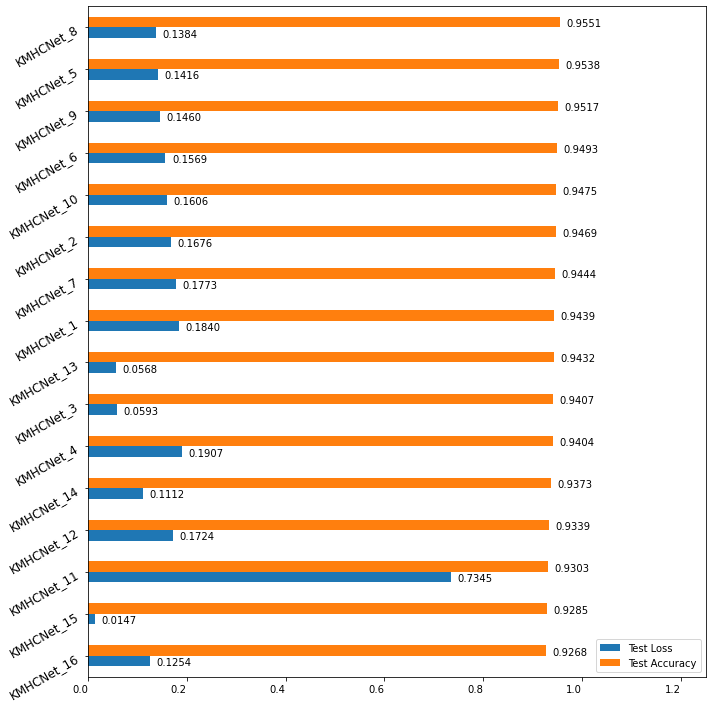

In [25]:
fig = plt.figure()
ax = test_df.plot.barh(figsize=(10, 10), rot=30, fontsize=12, xlim = (0, 1.25))

x_offset = 0.013
y_offset = -0.225

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.4f}".format(b.x1)        
    ax.annotate(val, (b.x1+x_offset, b.y1 + y_offset))
    
plt.xticks(
    horizontalalignment='right',
#     fontweight='light',
    fontsize='medium',
)
plt.tight_layout()
plt.legend(loc=4)
plt.savefig(f'{graph_path}/Test_Result_for_All.jpg')

In [26]:
l = [k for i, k in enumerate(ax.patches) if i%2!=1]
l

In [27]:
def getSampleGraph(directory, filename=None):
    if filename == None:
        filename = 'SampleOutputs'
    img = cv2.imread(f'{directory}/{filename}.jpg')
    img = torch.from_numpy(img).permute(2,0,1)
    img = bgr_to_rgb(img) / 255
    return img

In [28]:
def pltSubpot(cord, pos, cp, title, pic, titleShow = True):
    plt.subplot2grid(cord, pos, colspan=cp)
    plt.axis('off')
    if titleShow:
        plt.title(title, fontdict = {'fontsize': 20})    
    plt.imshow(pic, cmap = plt.cm.gray)

In [29]:
def specFromName(name):
    spec = name.split('_')
    return [spec[0], spec[1], spec[2], spec[3], spec[4]]

In [30]:
# fig = plt.subplots(18, 6, figsize=(70, 180), dpi=45)
# graph_dim = (18, 6)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Input Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center')
# plt.axis('off')

# for i in range(5):
#     inputImg = getSampleGraph(f'./InputSample', filename = f'G{i+1}')
#     pltSubpot(graph_dim, (0, i+1), 1, '', inputImg.permute(1,2,0), titleShow=False)

# plt.subplot2grid(graph_dim, (1, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Target Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center')
# plt.axis('off')

# for i in range(5):
#     targetImg = getSampleGraph(f'./TargetSample', filename = f'T{i+1}')
#     pltSubpot(graph_dim, (1, i+1), 1, '', targetImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders)):
#     idx = f+2
#     folder = model_data_folders[f]
    
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center')
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'S{i+1}')
#         pltSubpot(graph_dim, (idx, i+1), 1, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout()
# plt.savefig(f'{graph_path}/all.jpg')
# # plt.close(fig)

In [31]:
# ?plt.text

In [32]:
# fig = plt.subplots(10, 16, figsize=(50, 100), dpi=45)
# graph_dim = (10, 16)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Input Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center',
#          rotation=90)
# plt.axis('off')

# for i in range(5):
#     inputImg = getSampleGraph(f'./InputSample', filename = f'G{i+1}')
#     pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)

# plt.subplot2grid(graph_dim, (1, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Target Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center',
#          rotation=90)
# plt.axis('off')

# for i in range(5):
#     targetImg = getSampleGraph(f'./TargetSample', filename = f'T{i+1}')
#     pltSubpot(graph_dim, (1, (3*i)+1), 3, '', targetImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders[:8])):
#     idx = f+2
#     folder = model_data_folders[f]
    
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center',
#              rotation=90)
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'S{i+1}')
#         pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout()
# plt.savefig(f'{graph_path}/all_1st.jpg')
# # plt.close()

In [33]:
model_data_folders

['Unet++_Resnet152_LAB_MS-SSIM_None',
 'Unet++_Resnet50_LAB_MS-SSIM_None',
 'Unet++_Resnet152_RGB_MS-SSIM_None',
 'Unet++_Resnet34_LAB_MS-SSIM_None',
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None',
 'Unet++_Resnet18_LAB_MS-SSIM_None',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None',
 'Unet++_Resnet101_LAB_MS-SSIM_None',
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None',
 'Unet_Resnet152_LAB_MS-SSIM_None',
 'Unet++_Resnet152_LAB_MSELoss_None',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50',
 'Unet++_Resnet50_RGB_MS-SSIM_None',
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16',
 'Unet++_Resnet152_LAB_MSELoss_Vgg16',
 'Unet++_Resnet152_LAB_MSELoss_Resnet50']

In [34]:
models_table = {}
model_name_list = []
arch_List = []
encoder_List = []
colorsspace_List = []
loss_fn_List = []
embedding_List = []
epoch_list = [ep[1] for ep in model_dict]

for i, md in enumerate(model_data_folders, 1):
    model_name_list.append(name_dict[md])
    
    arch, encoder, colorsspace, loss_fn, embedding = specFromName(md)
    arch_List.append(arch)
    encoder_List.append(encoder)
    colorsspace_List.append(colorsspace)
    loss_fn_List.append(loss_fn)
    embedding_List.append(embedding)

models_table['Architecture'] = arch_List
models_table['Encoder'] = encoder_List
models_table['ColorSpace_for_Loss_Calculation'] = colorsspace_List
models_table['Loss_Function'] = loss_fn_List
models_table['Embedding'] = embedding_List
models_table['Test_Accuracy'] = [f'{ta*100:.2f}%' for ta in test_accuracy]
models_table['Test_Loss'] = [f'{tl*100:.2f}%' for tl in test_loss]
models_table['Epochs_Trained'] = epoch_list

In [35]:
models_table_df = pd.DataFrame(models_table, index = model_name_list)

In [36]:
models_table_df

,Architecture,Encoder,ColorSpace_for_Loss_Calculation,Loss_Function,Embedding,Test_Accuracy,Test_Loss,Epochs_Trained
KMHCNet_1,Unet++,Resnet152,LAB,MS-SSIM,None,94.39%,18.40%,43
KMHCNet_2,Unet++,Resnet50,LAB,MS-SSIM,None,94.69%,16.76%,39
KMHCNet_3,Unet++,Resnet152,RGB,MS-SSIM,None,94.07%,5.93%,38
KMHCNet_4,Unet++,Resnet34,LAB,MS-SSIM,None,94.04%,19.07%,33
KMHCNet_5,Unet++,Inceptionresnetv2,LAB,MS-SSIM,None,95.38%,14.16%,27
KMHCNet_6,Unet++,Resnet18,LAB,MS-SSIM,None,94.93%,15.69%,26
KMHCNet_7,Unet++,Efficientnet-b6,LAB,MS-SSIM,None,94.44%,17.73%,25
KMHCNet_8,Unet++,Resnet101,LAB,MS-SSIM,None,95.51%,13.84%,23
KMHCNet_9,Unet,Inceptionresnetv2,LAB,MS-SSIM,None,95.17%,14.60%,20
KMHCNet_10,Unet,Resnet152,LAB,MS-SSIM,None,94.75%,16.06%,20


<Figure size 432x288 with 0 Axes>

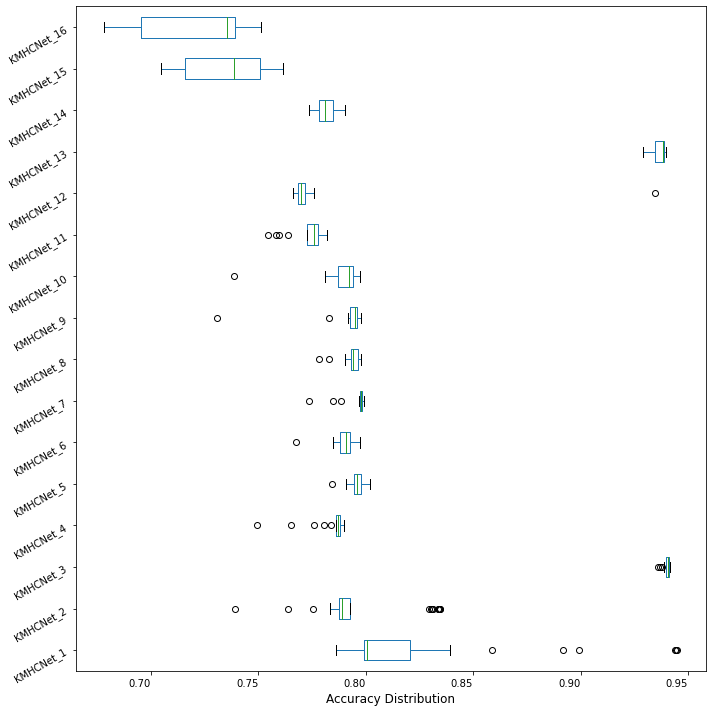

In [37]:
fig = plt.figure()
accuracy_df.plot.box(vert=False, figsize=(10, 10), rot=30)
plt.xticks(
    horizontalalignment='right',
    fontsize='medium',
)
plt.xlabel('Accuracy Distribution', fontsize='large',)
plt.tight_layout()
plt.savefig(f'{graph_path}/Accuracy_Distribution.jpg')

<Figure size 432x288 with 0 Axes>

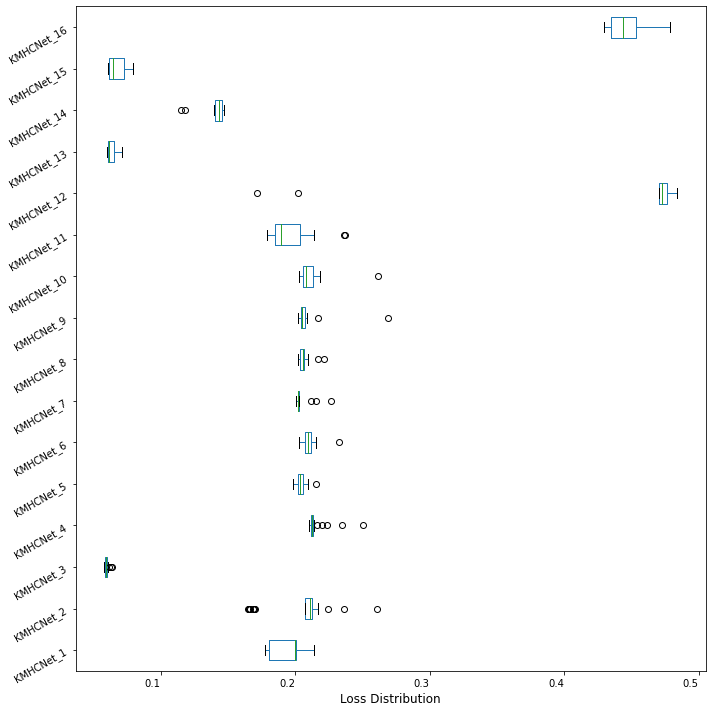

In [38]:
fig = plt.figure()
loss_df.plot.box(vert=False, figsize=(10, 10), rot=30)
plt.xticks(
    horizontalalignment='right',
    fontsize='medium',
)
plt.xlabel('Loss Distribution', fontsize='large',)
plt.tight_layout()
plt.savefig(f'{graph_path}/Loss_Distribution.jpg')

In [39]:
testDir = './RealTest/'
testImg = os.listdir(testDir)
img_dim = 256

In [40]:
testImgs = []
for ti in testImg:
    timg = cv2.imread(f'{testDir}{ti}')
    timg = cv2.resize(timg, (img_dim, img_dim))
    timg = torch.from_numpy(timg).permute(2,0,1)
    testImgs.append(timg[0].unsqueeze(0))

In [41]:
testImgs = torch.stack(tuple(testImgs))

In [42]:
testImgs.shape

torch.Size([5, 1, 256, 256])

In [43]:
# fig = plt.subplots(1, 5, figsize=(50, 10), dpi=45)
# graph_dim = (1, 5)

# for i, ti in enumerate(testImgs):
#     pltSubpot(graph_dim, (0, i), 1, '', ti.permute(1,2,0), titleShow=False)

In [44]:
pd.DataFrame(models_table_df.Test_Accuracy)

,Test_Accuracy
KMHCNet_1,94.39%
KMHCNet_2,94.69%
KMHCNet_3,94.07%
KMHCNet_4,94.04%
KMHCNet_5,95.38%
KMHCNet_6,94.93%
KMHCNet_7,94.44%
KMHCNet_8,95.51%
KMHCNet_9,95.17%
KMHCNet_10,94.75%


In [45]:
# loss_df

In [46]:
# fig, axes= plt.subplots(17, 16, figsize=(50, 165), dpi=45)
# graph_dim = (17, 16)


# # for ax in axes[0:,0]:
# #     ax.set_ylabel('fdg', rotation=90, size=70)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          'Input Image', 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center',
#          rotation=90)
# plt.axis('off')
    
# for i in range(5):
#     inputImg = getSampleGraph(f'./RealTest', filename = f'{i+1}')
#     pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders)):
#     idx = f+1
#     folder = model_data_folders[f]
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center',
#              rotation=90)
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'R{i+1}')
#         pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout()
# plt.savefig(f'{graph_path}/Real_All.jpg')
# # plt.close(fig)

In [47]:
# fig = plt.subplots(9, 16, figsize=(50, 90), dpi=45)
# graph_dim = (9, 16)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Input Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center',
#          rotation=90)
# plt.axis('off')

# for i in range(5):
#     inputImg = getSampleGraph(f'./InputSample', filename = f'G{i+1}')
#     pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders[8:])):
#     idx = f+1
#     folder = model_data_folders[f+8]
    
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center',
#              rotation=90)
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'R{i+1}')
#         pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout()
# plt.savefig(f'{graph_path}/real_2nd.jpg')
# # plt.close()

In [48]:
model_param_dict = {'Unet++_Resnet152_LAB_MS-SSIM_None': 83615394,
 'Unet++_Resnet50_LAB_MS-SSIM_None': 48979618,
 'Unet++_Resnet152_RGB_MS-SSIM_None': 83615394,
 'Unet++_Resnet34_LAB_MS-SSIM_None': 26072482,
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None': 71082562,
 'Unet++_Resnet18_LAB_MS-SSIM_None': 15964322,
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None': 43332554,
 'Unet++_Resnet101_LAB_MS-SSIM_None': 67971746,
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None': 62028866,
 'Unet_resnet152_LAB_MS-SSIM_None': 67150754,
 'Unet++_Resnet152_LAB_MSELoss_None': 83615394,
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50': 83615394,
 'Unet++_Resnet50_RGB_MS-SSIM_None': 48979618,
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16': 83615394,
 'Unet++_Resnet152_LAB_MSELoss_Vgg16': 83615394,
 'Unet++_Resnet152_LAB_MSELoss_Resnet50': 83615394}

In [49]:
model_param_dict

{'Unet++_Resnet152_LAB_MS-SSIM_None': 83615394,
 'Unet++_Resnet50_LAB_MS-SSIM_None': 48979618,
 'Unet++_Resnet152_RGB_MS-SSIM_None': 83615394,
 'Unet++_Resnet34_LAB_MS-SSIM_None': 26072482,
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None': 71082562,
 'Unet++_Resnet18_LAB_MS-SSIM_None': 15964322,
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None': 43332554,
 'Unet++_Resnet101_LAB_MS-SSIM_None': 67971746,
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None': 62028866,
 'Unet_resnet152_LAB_MS-SSIM_None': 67150754,
 'Unet++_Resnet152_LAB_MSELoss_None': 83615394,
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50': 83615394,
 'Unet++_Resnet50_RGB_MS-SSIM_None': 48979618,
 'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16': 83615394,
 'Unet++_Resnet152_LAB_MSELoss_Vgg16': 83615394,
 'Unet++_Resnet152_LAB_MSELoss_Resnet50': 83615394}

In [50]:
models_table['Trainable_Parameters'] = [f'{(model_param_dict[x] / 1000000):.2f} M' for x in model_data_folders]

KeyError: 'Unet_Resnet152_LAB_MS-SSIM_None'

In [ ]:
models_table_df = pd.DataFrame(models_table, index = model_name_list)

In [ ]:
models_table_df.to_csv('variant_table')

In [ ]:
models_table_df